# Exploratory Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## Explore all_data.csv

### Load the data:

In [2]:
all_data_df = pd.read_csv('data/all_data.csv')

In [4]:
all_data_df.shape

(1999516, 46)

### Let's preview the data:

In [5]:
all_data_df.head()

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
3,7084460,"""while arresting a man for resisting arrest"".\...",test,2016-11-01 16:53:33.561631+00,13,NaN,149218,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80


In [3]:
all_data_df.columns

Index(['id', 'comment_text', 'split', 'created_date', 'publication_id',
       'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
       'disagree', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat', 'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability', 'identity_annotator_count',
       'toxicity_annotator_count'],
      dtype='object')

### What are the data types of each column?

In [23]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999516 entries, 0 to 1999515
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   comment_text                         object 
 2   split                                object 
 3   created_date                         object 
 4   publication_id                       int64  
 5   parent_id                            float64
 6   article_id                           int64  
 7   rating                               object 
 8   funny                                int64  
 9   wow                                  int64  
 10  sad                                  int64  
 11  likes                                int64  
 12  disagree                             int64  
 13  toxicity                             float64
 14  severe_toxicity                      float64
 15  obscene                         

## Clean full dataset

### Check for missing values

From the display of number of null values per column, we observe that:
- There is 1 null value for `comment_text`, which makes that row unusable for training. We'll probably delete that row.
- The `parent_id` column has 864K+ null values. After doing research, I couldn't find any information on that column other than it being used for metadata from Jigsaw, which appears to no longer be available. We'll probably drop this column.
- The identity columns from `male` to `other_disability` have NaN values for one or more identities, which is okay for now because we'll be dividing the dataset into identity groups later on.

In [43]:
all_data_df.isna().sum()

id                                           0
comment_text                                 1
split                                        0
created_date                                 0
publication_id                               0
parent_id                               864807
article_id                                   0
rating                                       0
funny                                        0
wow                                          0
sad                                          0
likes                                        0
disagree                                     0
toxicity                                     0
severe_toxicity                              0
obscene                                      0
sexual_explicit                              0
identity_attack                              0
insult                                       0
threat                                       0
male                                   1551516
female       

Let's visualize the missing data, represented in yellow below. There are rows that don't have identity labels, but all other columns other than parent_id are non-null. We'll keep these rows because they might still be important for training.

<Axes: >

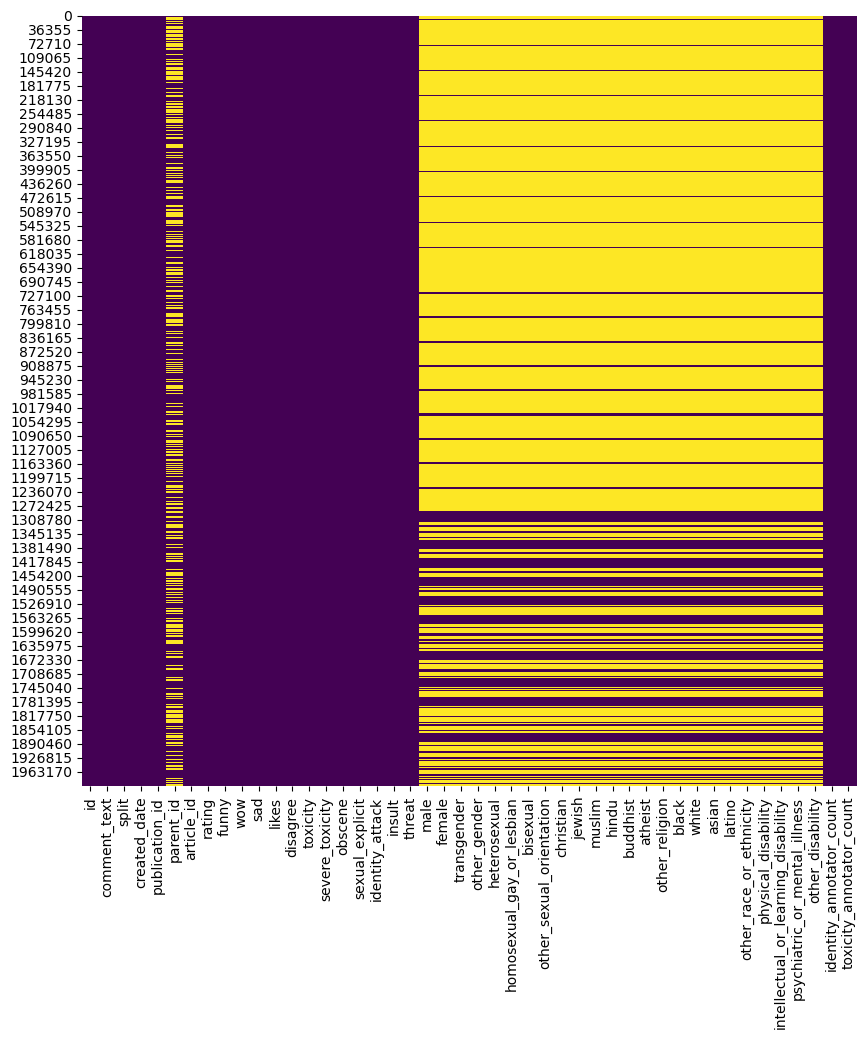

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(all_data_df.isna(),cbar=False,cmap='viridis')

### Delete the row with the msising comment
Let's inspect the 1 missing comment. Looks like we'll have to delete this row since there will be no input words to train on.

In [33]:
all_data_df[pd.isnull(all_data_df["comment_text"])]

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
446630,392337,NaN,train,2016-07-18 19:34:48.278774+00,13,392165.0,141670,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4


Delete the row:

In [53]:
all_data_df_cleansed = all_data_df.copy().drop(index=all_data_df[pd.isna(all_data_df['comment_text'])].index[0])

In [54]:
all_data_df.shape

(1999516, 46)

In [55]:
all_data_df_cleansed.shape

(1999515, 46)

### Drop `parent_id` column

In [57]:
all_data_df_cleansed = all_data_df_cleansed.copy().drop(['parent_id'], axis=1)

In [58]:
all_data_df.shape

(1999516, 46)

In [59]:
all_data_df_cleansed.shape

(1999515, 45)

## Explore `toxicity` column
The dataset from the all_data.csv file has a `toxicity` column that represents the toxic rating for a comment. The values for this column range from decimals between 0 and 1 inclusive. `toxicity` values >= 0.5 are considered to be toxic.

The histogram below shows that most toxicity values are zero.

<Axes: title={'center': 'Distribution of Toxicity Column'}, ylabel='Frequency'>

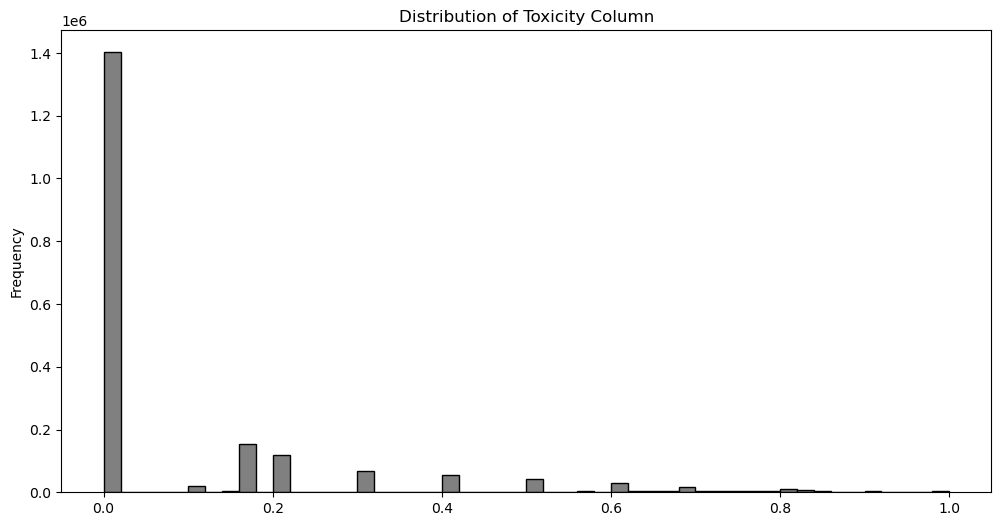

In [82]:
all_data_df_cleansed['toxicity'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black',
                                 title="Distribution of Toxicity Column")

Let's exclude the zero `toxicity` values so we can see the rest of the distribution better. The histogram below shows that around 0.17 has the highest number of occurences, and higher toxicity ratings are less frequent.

<Axes: title={'center': 'Distribution of Toxicity Column, Excluding Zero Values'}, ylabel='Frequency'>

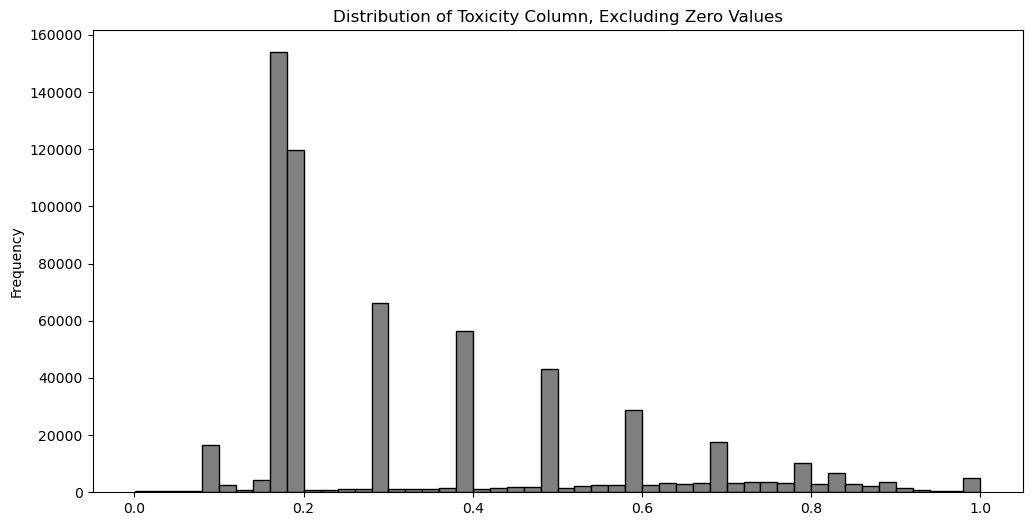

In [75]:
toxicity_nonzero = all_data_df_cleansed[all_data_df_cleansed['toxicity'] > 0]
toxicity_nonzero['toxicity'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black',
                                 title="Distribution of Toxicity Column, Excluding Zero Values")

### Add `toxicity_binary` column
Since the dataset was originally designed for binary classification, which will be our main task, we'll add another column `toxicity_binary` and assign it with 0 when `toxicity` < 0.5 and 1 when `toxicity` >= 0.5.

In [84]:
all_data_df_cleansed['toxicity_binary'] = (all_data_df_cleansed['toxicity'] >= 0.5).astype(int)

In [86]:
all_data_df_cleansed[['toxicity','toxicity_binary']]

,toxicity,toxicity_binary
0,0.373134,0
1,0.605263,1
2,0.666667,1
3,0.815789,1
4,0.550000,1
...,...,...
1999511,0.400000,0
1999512,0.400000,0
1999513,0.400000,0
1999514,0.400000,0


## Check data balance for full dataset
We see that there are significantly more nontoxic labels than toxic labels.

<Axes: title={'center': 'Distribution of Nontoxic and Toxic Labels'}, ylabel='Frequency'>

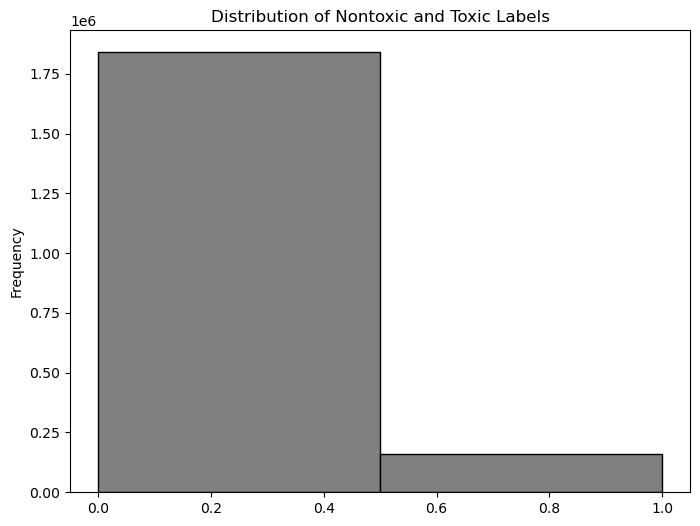

In [121]:
all_data_df_cleansed['toxicity_binary'].plot(kind='hist', bins=2, figsize=(8,6), facecolor='grey',edgecolor='black',
                                 title="Distribution of Nontoxic and Toxic Labels")

In [106]:
num_toxic = (all_data_df_cleansed['toxicity_binary'] == 1).astype(int).sum()
total_num = len(all_data_df_cleansed)
print("There are ", str(total_num), " total rows.")
print("There are ", str(num_toxic), " rows labeled toxic, which make up ", str(round((num_toxic/total_num)*100)), "% of the data.")
print("There are ", str(total_num - num_toxic), " rows labeled nontoxic, which make up ", str(round(((total_num - num_toxic)/total_num)*100)), "% of the data.")

There are  1999515  total rows.
There are  159782  rows labeled toxic, which make up  8 % of the data.
There are  1839733  rows labeled nontoxic, which make up  92 % of the data.


## Explore Disability Subset

### Extract disability subset from all_data_df
Since we're interested in toxicity detection towards people with disabilities, our focus will be on the subset of online comments that mention disability. We create a dataframe that is labeled with at least one of the disability-related columns.

In [88]:
disability_df = all_data_df_cleansed[(all_data_df_cleansed["physical_disability"] > 0) | 
           (all_data_df_cleansed["intellectual_or_learning_disability"] > 0) | 
           (all_data_df_cleansed["psychiatric_or_mental_illness"] > 0) | 
           (all_data_df_cleansed["other_disability"] > 0)]

In [89]:
disability_df.shape

(18665, 46)

In [90]:
disability_df.columns

Index(['id', 'comment_text', 'split', 'created_date', 'publication_id',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat', 'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability', 'identity_annotator_count',
       'toxicity_annotator_count', 'toxicity_binary'],
      dtype='object')

### Check column data types

In [91]:
disability_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18665 entries, 7705 to 1999515
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   18665 non-null  int64  
 1   comment_text                         18665 non-null  object 
 2   split                                18665 non-null  object 
 3   created_date                         18665 non-null  object 
 4   publication_id                       18665 non-null  int64  
 5   article_id                           18665 non-null  int64  
 6   rating                               18665 non-null  object 
 7   funny                                18665 non-null  int64  
 8   wow                                  18665 non-null  int64  
 9   sad                                  18665 non-null  int64  
 10  likes                                18665 non-null  int64  
 11  disagree               

### Check for missing data
All columns have no missing data:

In [92]:
disability_df.isna().sum()

id                                     0
comment_text                           0
split                                  0
created_date                           0
publication_id                         0
article_id                             0
rating                                 0
funny                                  0
wow                                    0
sad                                    0
likes                                  0
disagree                               0
toxicity                               0
severe_toxicity                        0
obscene                                0
sexual_explicit                        0
identity_attack                        0
insult                                 0
threat                                 0
male                                   0
female                                 0
transgender                            0
other_gender                           0
heterosexual                           0
homosexual_gay_o

### Preview the comments labeled with the "psychiatric_or_mental_illness" identity

In [13]:
disability_df.sort_values(by=['psychiatric_or_mental_illness'], ascending=False)

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
1970283,6302016,"Since Trump said it's not a gun problem, but a...",train,2017-11-06 18:28:51.343162+00,21,6301876.0,397596,approved,0,0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,4,10
781595,656877,Agreed. Some years back I recall a study comp...,train,2016-12-03 20:07:08.114791+00,21,655271.0,154324,approved,0,1,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,4,4
715707,7162994,"Anxiety, depression, mental illness? Fair eno...",test,2017-09-19 12:56:13.293333+00,54,5978848.0,379397,approved,0,0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,4,6
715585,5553753,The facts do not match your claims. $80K is ...,train,2017-07-08 16:20:41.828778+00,102,5553506.0,352961,approved,0,0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.250000,4,4
715508,5355206,You're right Greeleaf. I hadn't thought that h...,train,2017-06-04 15:46:52.431845+00,102,5354862.0,340566,approved,0,0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571934,5130361,"Off course most economist will agree, but the ...",train,2017-04-13 19:39:37.199892+00,54,5130099.0,326739,approved,0,0,...,0.000000,0.0,0.0,0.0,0.166667,0.000000,0.0,0.000000,6,4
1571948,7043047,"RIP, very sad ... I've got something in my eye...",test,2017-07-27 18:26:59.952596+00,102,NaN,360063,approved,0,0,...,0.166667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.166667,6,4
1571963,6265243,Speaking of politics and learning: The threa...,train,2017-11-01 14:03:05.051181+00,53,NaN,395749,approved,3,0,...,0.000000,0.0,0.0,0.0,0.000000,0.166667,0.0,0.000000,6,4
1571977,277841,Jeezus wept.\n\nTo read the comments of so-cal...,train,2016-04-12 01:51:58.347896+00,6,NaN,58446,approved,0,0,...,0.000000,0.0,0.0,0.0,0.000000,0.166667,0.0,0.000000,6,4


## Check data imbalance for disability subset

### Nontoxic vs. Toxic Labels

<Axes: title={'center': 'Distribution of Nontoxic and Toxic Labels for Disability Subset'}, ylabel='Frequency'>

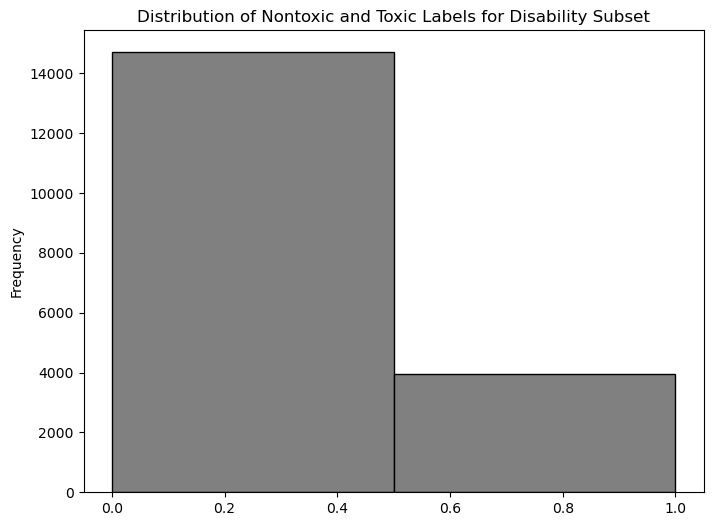

In [120]:
disability_df['toxicity_binary'].plot(kind='hist', bins=2, figsize=(8,6), facecolor='grey',edgecolor='black',
                                 title="Distribution of Nontoxic and Toxic Labels for Disability Subset")

The data imbalance for the disability subset is less drastic compared to the data imbalance in the full dataset, but we'll still need to try some techniques to address this imbalance.

In [119]:
num_toxic = (disability_df['toxicity_binary'] == 1).astype(int).sum()
total_num = len(disability_df)
print("There are ", str(total_num), " total rows.")
print("There are ", str(num_toxic), " rows labeled toxic, which make up ", str(round((num_toxic/total_num)*100)), "% of the data.")
print("There are ", str(total_num - num_toxic), " rows labeled nontoxic, which make up ", str(round(((total_num - num_toxic)/total_num)*100)), "% of the data.")

There are  18665  total rows.
There are  3965  rows labeled toxic, which make up  21 % of the data.
There are  14700  rows labeled nontoxic, which make up  79 % of the data.


### Explore data balance across disability subtypes

In [131]:
dis_subtypes_freq = [(disability_df['physical_disability'] > 0).astype(int).sum(),
                    (disability_df['intellectual_or_learning_disability'] > 0).astype(int).sum(),
                    (disability_df['psychiatric_or_mental_illness'] > 0).astype(int).sum(),
                    (disability_df['other_disability'] > 0).astype(int).sum()]
dis_subtypes_cols = ['physical_disability','intellectual_or_learning_disability',
                     'psychiatric_or_mental_illness','other_disability']

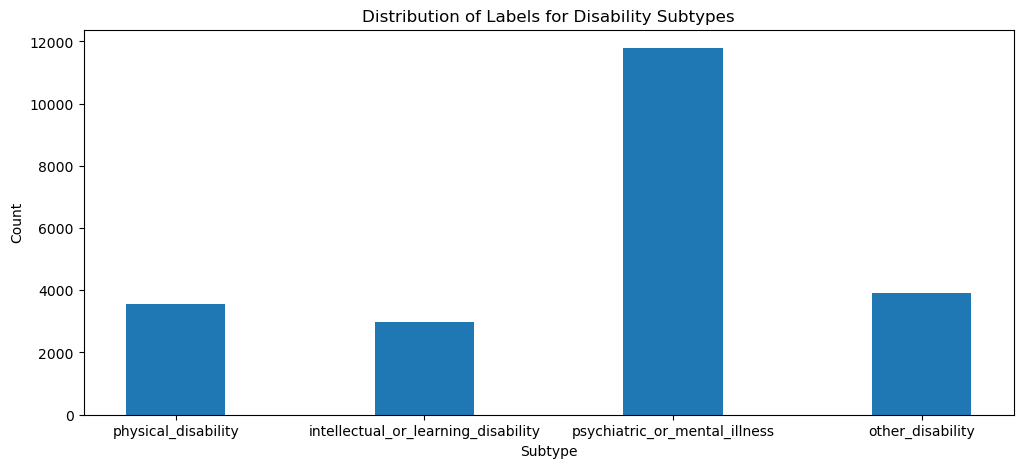

In [134]:
plt.figure(figsize = (12, 5))
plt.bar(dis_subtypes_cols, dis_subtypes_freq, 
        width = 0.4)
plt.xlabel("Subtype")
plt.ylabel("Count")
plt.title("Distribution of Labels for Disability Subtypes")
plt.show()

### Correlation Heatmap

<Axes: >

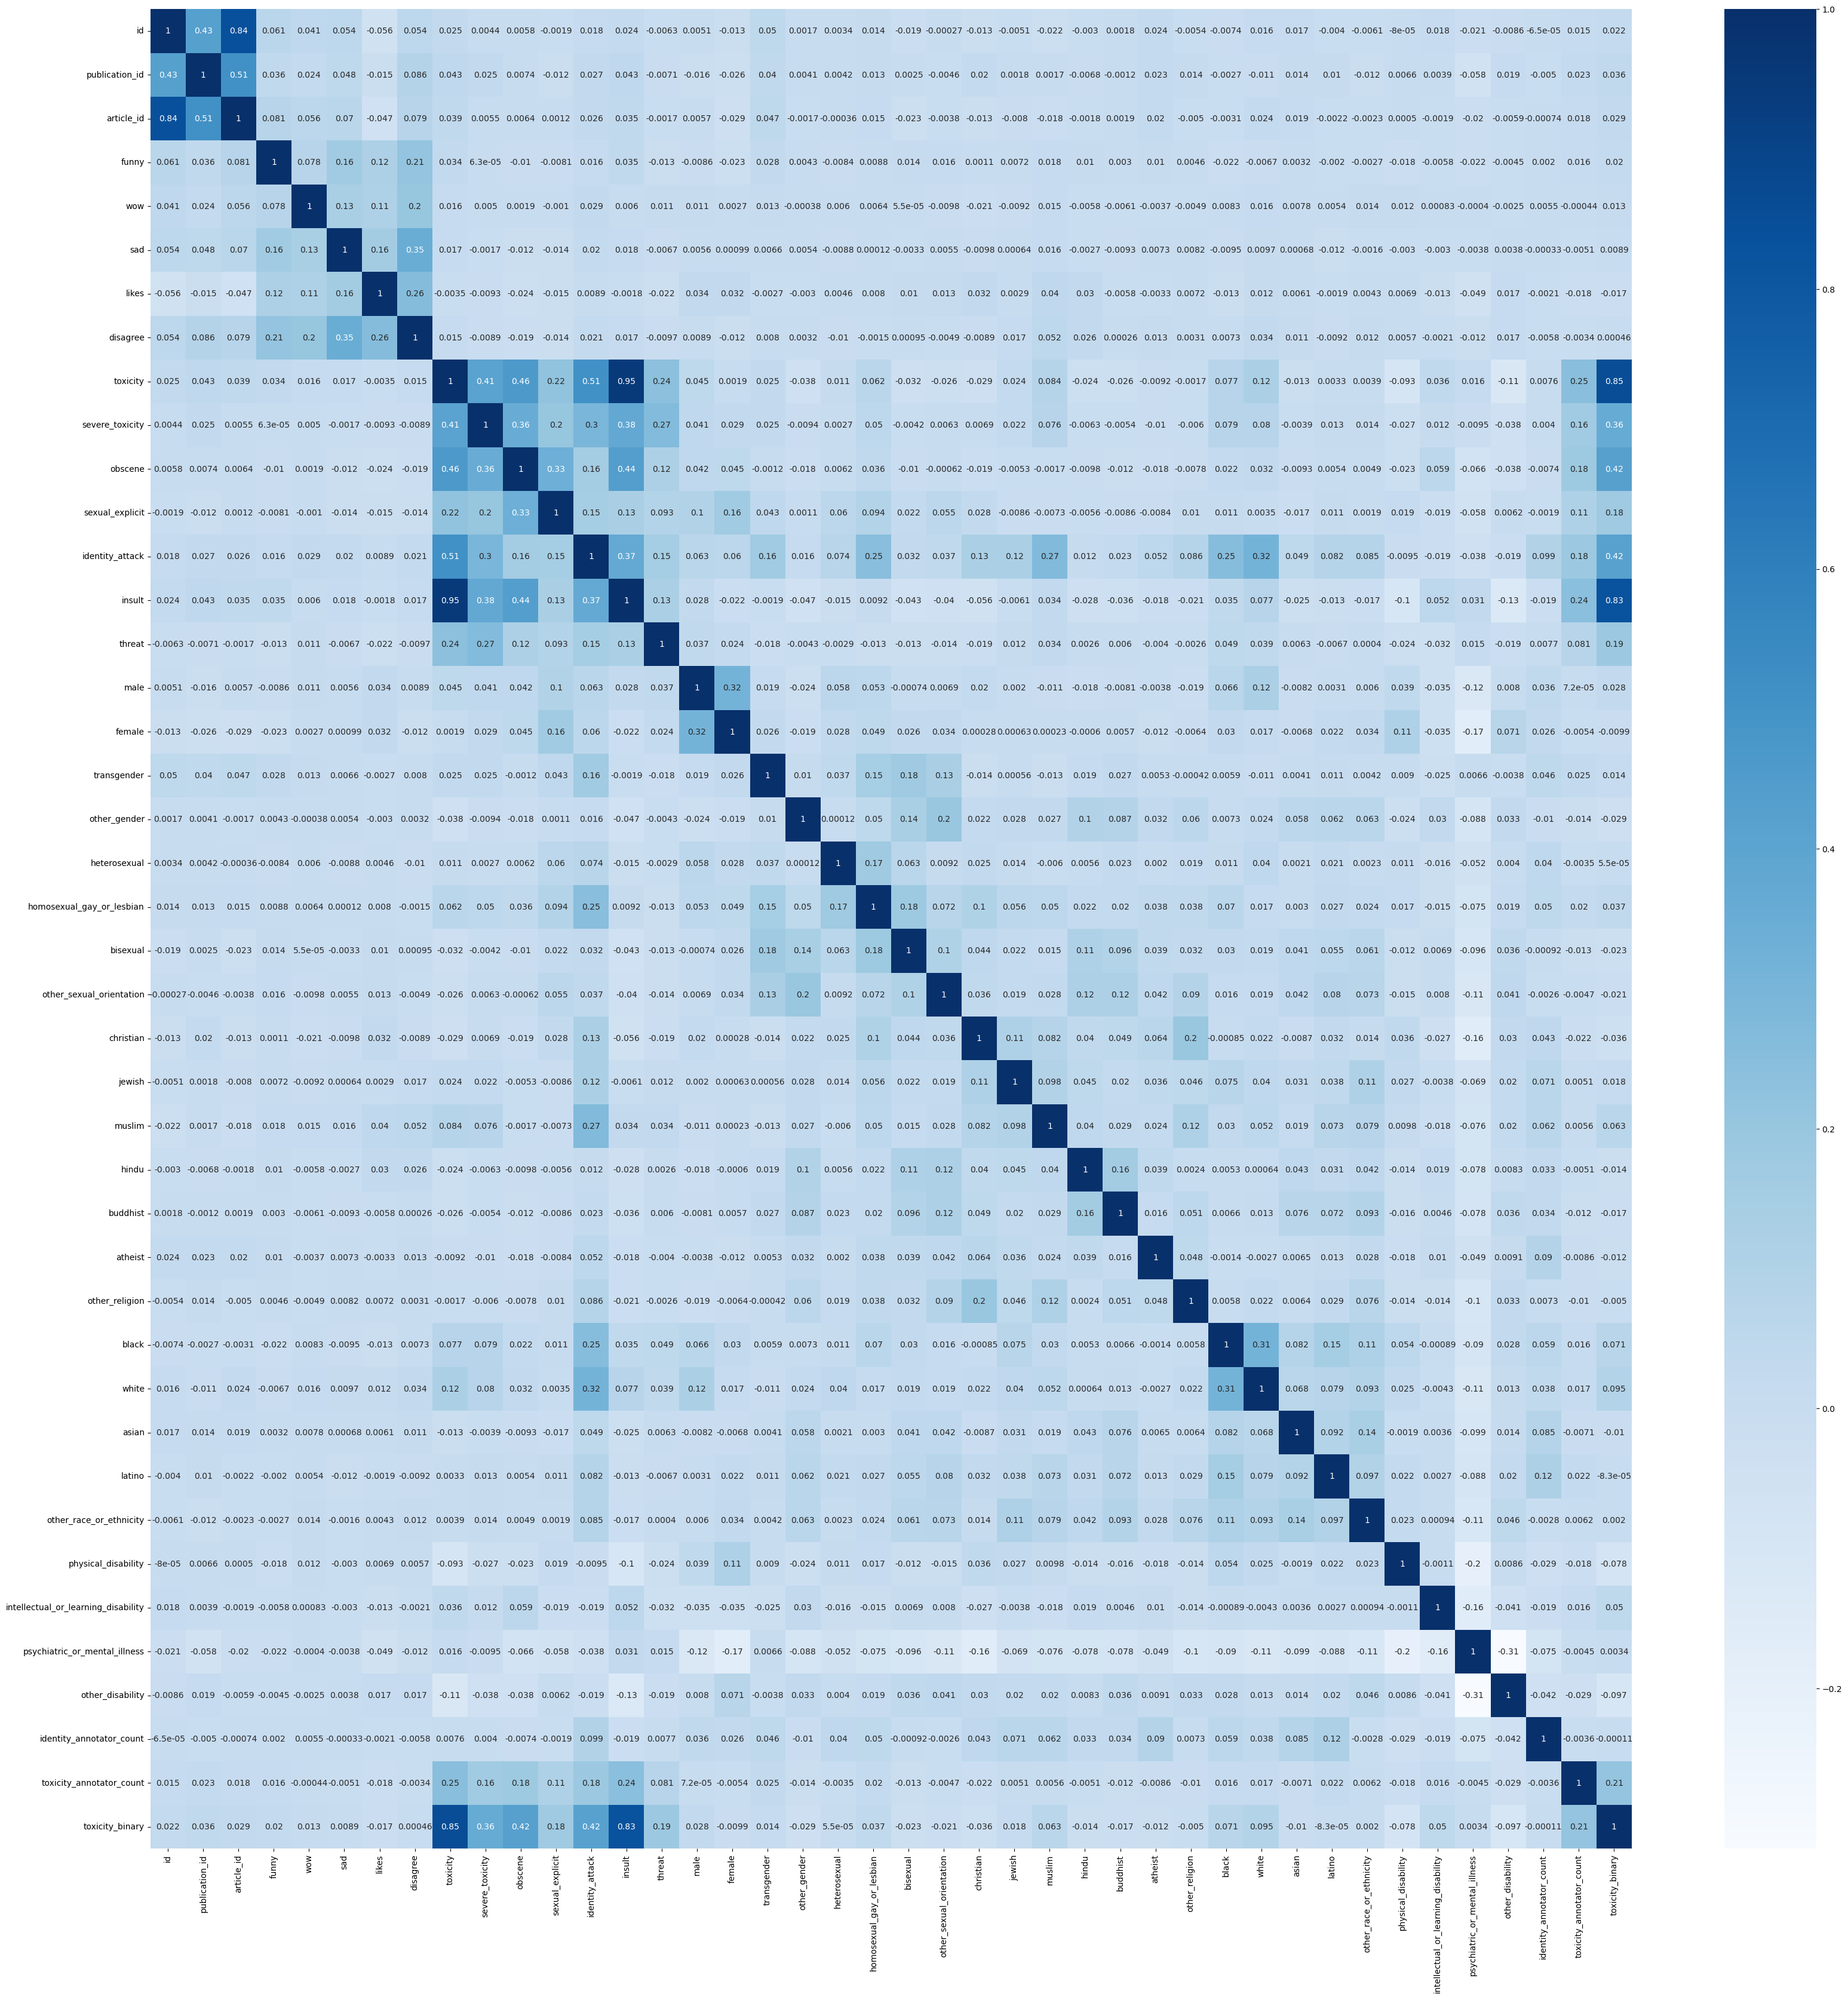

In [110]:
plt.figure(figsize=(40,40))
sns.heatmap(disability_df.corr(),cbar=True,annot=True,cmap='Blues')

In [107]:
disability_df.columns

Index(['id', 'comment_text', 'split', 'created_date', 'publication_id',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat', 'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability', 'identity_annotator_count',
       'toxicity_annotator_count', 'toxicity_binary'],
      dtype='object')

In [6]:
identity_ann_df = pd.read_csv('data/identity_individual_annotations.csv')
toxicity_ann_df = pd.read_csv('data/toxicity_individual_annotations.csv')

In [7]:
identity_ann_df.shape

(2597365, 7)

In [8]:
identity_ann_df.head()

,id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
0,59856,211,none,none,none,none,none
1,59856,683,intellectual_or_learning none,none,none,none,none
2,59856,8899,none,none,none,none,none
3,59856,67,none,none,none,none,none
4,239579,8900,none,none,none,none,none


In [9]:
toxicity_ann_df.shape

(15855266, 9)

In [10]:
toxicity_ann_df.head()

,id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat
0,59859,0,1,0,0,1,1,0,0
1,59859,1,1,0,0,0,1,0,0
2,59859,2,1,0,0,1,1,0,0
3,59859,3,1,1,0,0,1,0,0
4,59859,4,1,0,0,0,1,0,0
